In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
comahue = pd.read_csv('3CUNComahue_process.txt', sep='\t')
salvador = pd.read_csv('3CUNCSalvador_process.txt', sep='\t')
cp = pd.read_csv('assets/codigos_postales.csv')

In [58]:
salvador.head()

,university,career,inscription_date,first_name,last_name,gender,age,postal_code,location,email
0,universidad del salvador,licenciatura en ciencias ambientales,2020-09-29,monica,farley,female,50,2105,cañada rica,maria48@yahoo.com
1,universidad del salvador,bioquímica,2020-11-21,anthony,baird,male,52,1665,jose clemente paz,hernandezandrew@hotmail.com
2,universidad del salvador,licenciatura en ciencia política,2020-11-02,adam,clark,male,33,6201,chanilao,ymills@gmail.com
3,universidad del salvador,licenciatura en gestión de agroalimentos,2020-11-29,sarah,aguirre,female,20,7503,cristiano muerto,paul08@gmail.com
4,universidad del salvador,contador público,2020-09-15,robert,johnson,male,48,6663,juan vela,brownjane@yahoo.com


In [59]:
comahue.head()

,university,career,inscription_date,first_name,last_name,gender,age,postal_code,location,email
0,univ. nacional del comahue,contador público,2020-10-31,amanda,hill,female,32,8129,17 de agosto,tyler57@hotmail.com
1,univ. nacional del comahue,agronomía,2021-01-31,ryan,davis,male,87,3328,colonia japonesa,patriciazamora@gmail.com
2,univ. nacional del comahue,diseño industrial,2020-12-03,sandra,burton,female,52,4500,alto del saladillo,kleinlauren@gmail.com
3,univ. nacional del comahue,licenciatura en ciencias geológicas,2020-11-24,rebekah,gonzales,female,43,7609,balneario la caleta,mterry@yahoo.com
4,univ. nacional del comahue,licenciatura en gestión de agroalimentos,2020-10-23,laura,gibson,female,83,3087,felicia,carmenmckinney@yahoo.com


In [36]:
dff = comahue[comahue.gender == 'female'].groupby('career').count().university

dfm = comahue[comahue.gender == 'male'].groupby('career').count().university

df_carreras_genero = pd.DataFrame({'career':dff.index, 
                                   'female':dff.values,
                                   'male':dfm.values})

df_carreras_genero['total'] = df_carreras_genero['female'] + df_carreras_genero['male']

df_carreras_genero = df_carreras_genero.sort_values(by = 'total', ascending = False)

df_carreras_genero['difference'] = abs(df_carreras_genero['male'] - df_carreras_genero['female']) / df_carreras_genero['total']

df_carreras_genero['male'] = df_carreras_genero['male'] * -1

In [42]:
df_carreras_genero.sort_values(by ='difference')

,career,female,male,total,difference
5,contador público,17,-17,34,0.000000
30,licenciatura en terapia ocupacional,14,-14,28,0.000000
7,diseño industrial,17,-17,34,0.000000
12,licenciatura en administración,22,-23,45,0.022222
31,medicina,22,-23,45,0.022222
10,ingeniería en informática,19,-20,39,0.025641
24,licenciatura en musicoterapia,18,-19,37,0.027027
15,licenciatura en ciencia y tecnología de alimentos,17,-16,33,0.030303
9,ingeniería electrónica,16,-15,31,0.032258
8,farmacia,16,-18,34,0.058824


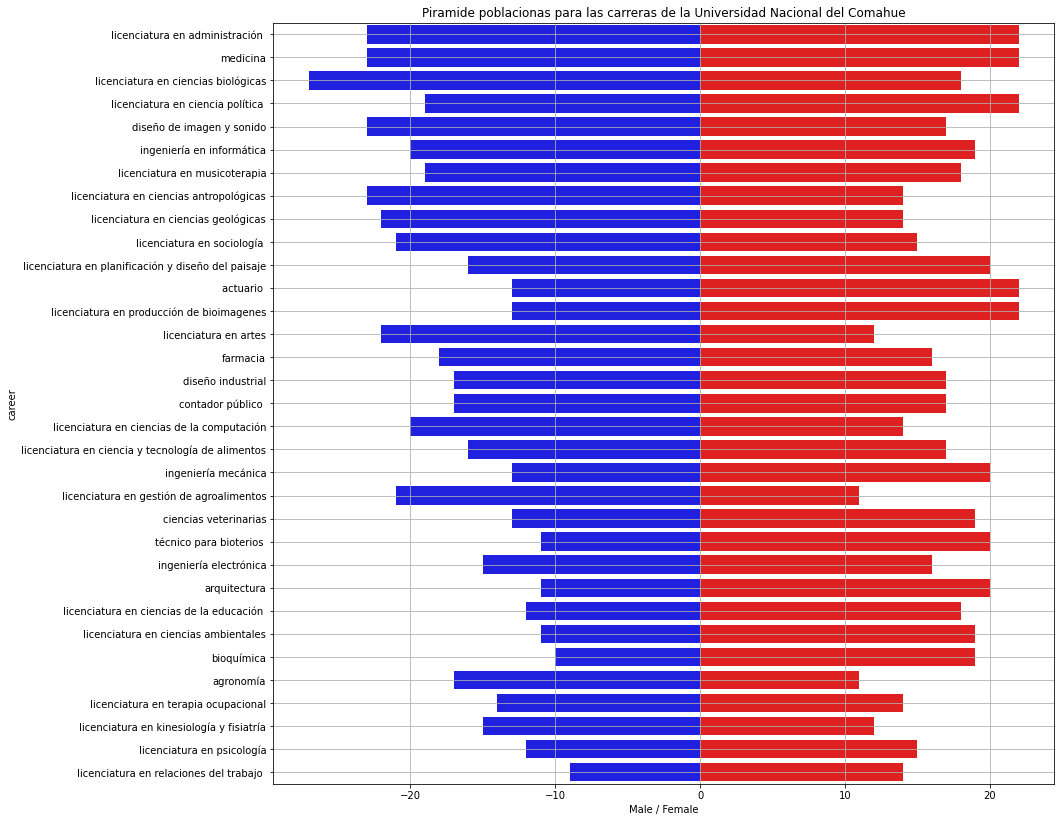

In [89]:
plt.figure(figsize=(14, 14))
ax1 = sns.barplot(x='male', y='career', data=df_carreras_genero, color="b")
ax2 = sns.barplot(x='female', y='career', data=df_carreras_genero, color="r")
plt.title("Piramide poblacionas para las carreras de la Universidad Nacional del Comahue")
plt.xlabel("Male / Female")
plt.grid()
plt.show()

In [30]:
dff = salvador[salvador.gender == 'female'].groupby('career').count().university

dfm = salvador[salvador.gender == 'male'].groupby('career').count().university

df_carreras_genero = pd.DataFrame({'career':dff.index, 
                                   'female':dff.values,
                                   'male':dfm.values})

df_carreras_genero['total'] = df_carreras_genero['female'] + df_carreras_genero['male']

df_carreras_genero = df_carreras_genero.sort_values(by = 'total', ascending = False)

df_carreras_genero['male'] = df_carreras_genero['male'] * -1

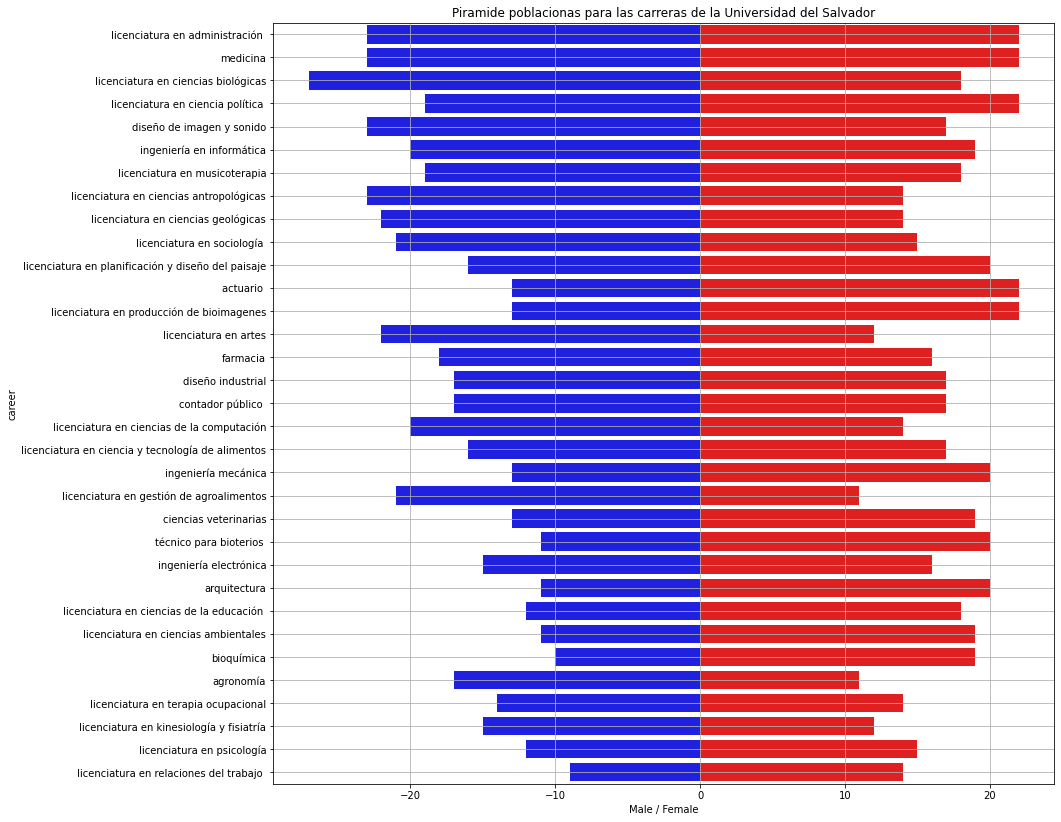

In [90]:
plt.figure(figsize=(14, 14))
ax1 = sns.barplot(x='male', y='career', data=df_carreras_genero, color="b")
ax2 = sns.barplot(x='female', y='career', data=df_carreras_genero, color="r")
plt.title("Piramide poblacionas para las carreras de la Universidad del Salvador")
plt.xlabel("Male / Female")
plt.grid()
plt.show()

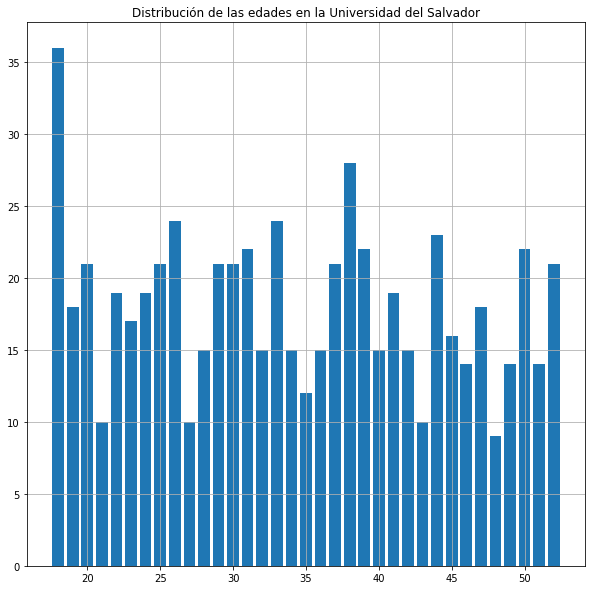

In [45]:
plt.figure(figsize=(10, 10))
plt.bar(salvador.groupby('age').count().university.index, 
        salvador.groupby('age').count().university.values)
plt.title("Distribución de las edades en la Universidad del Salvador")
plt.grid()
plt.show()

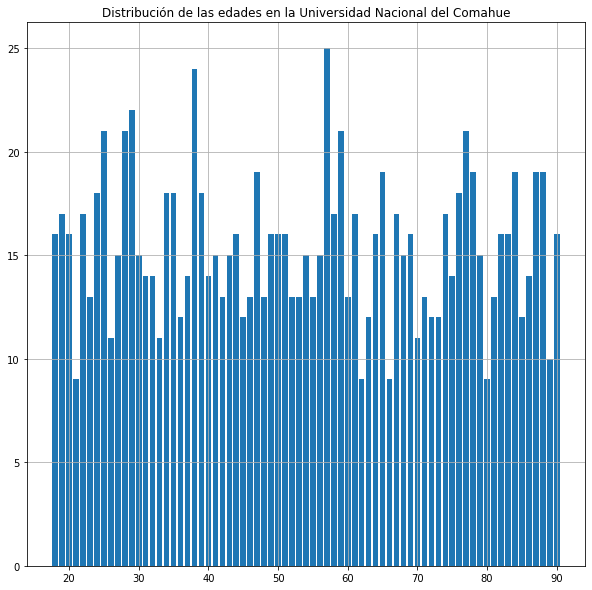

In [44]:
plt.figure(figsize=(10, 10))
plt.bar(comahue.groupby('age').count().university.index, 
        comahue.groupby('age').count().university.values)
plt.title("Distribución de las edades en la Universidad Nacional del Comahue")
plt.grid()
plt.show()

In [52]:
salvador.groupby('gender').count().university.values

array([333, 303])

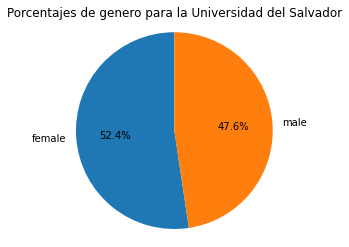

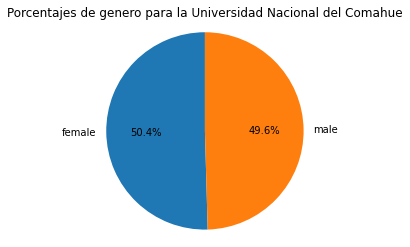

In [82]:
fig1, ax1 = plt.subplots()

ax1.pie(salvador.groupby('gender').count().university.values, 
        labels=salvador.groupby('gender').count().university.index, 
        autopct='%1.1f%%',
        startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Porcentajes de genero para la Universidad del Salvador")

plt.show()

fig1, ax1 = plt.subplots()

ax1.pie(comahue.groupby('gender').count().university.values, 
        labels=comahue.groupby('gender').count().university.index, 
        autopct='%1.1f%%',
        startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Porcentajes de genero para la Universidad Nacional del Comahue")

plt.show()

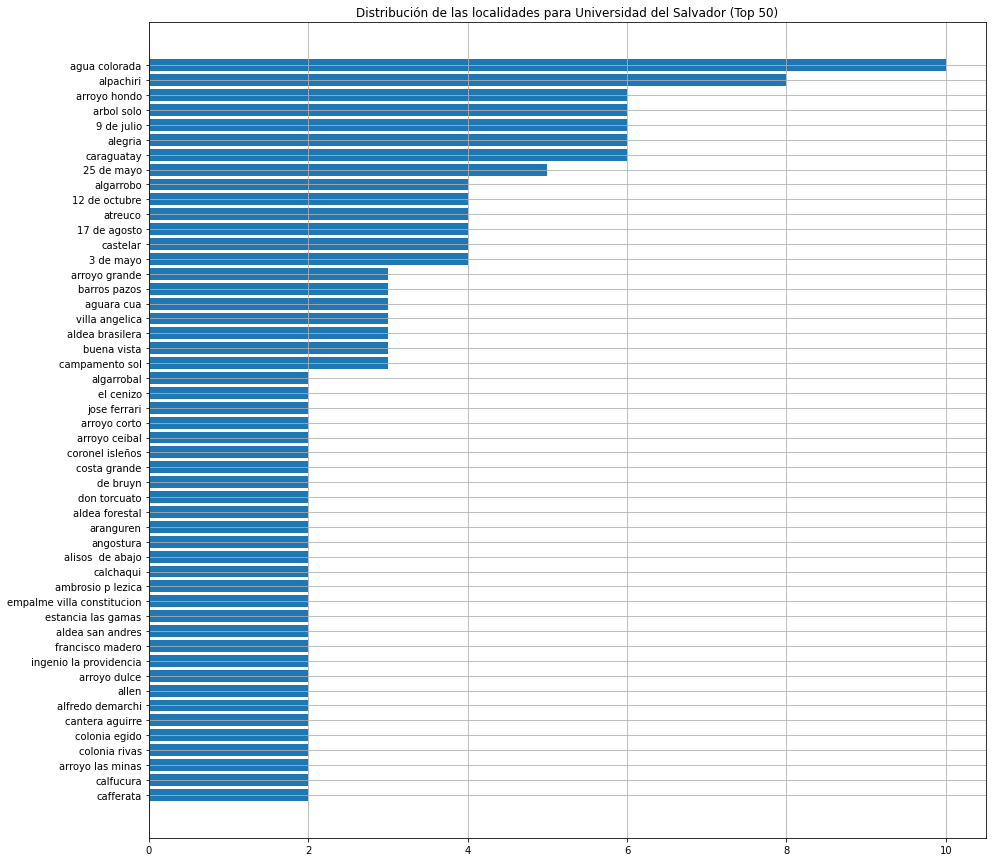

In [92]:
plt.figure(figsize=(15, 15))

plt.barh(salvador.groupby('location').count().university.sort_values().index[-50:],
        salvador.groupby('location').count().university.sort_values().values[-50:])

plt.title("Distribución de las localidades para Universidad del Salvador (Top 50)")
plt.grid()
plt.show()

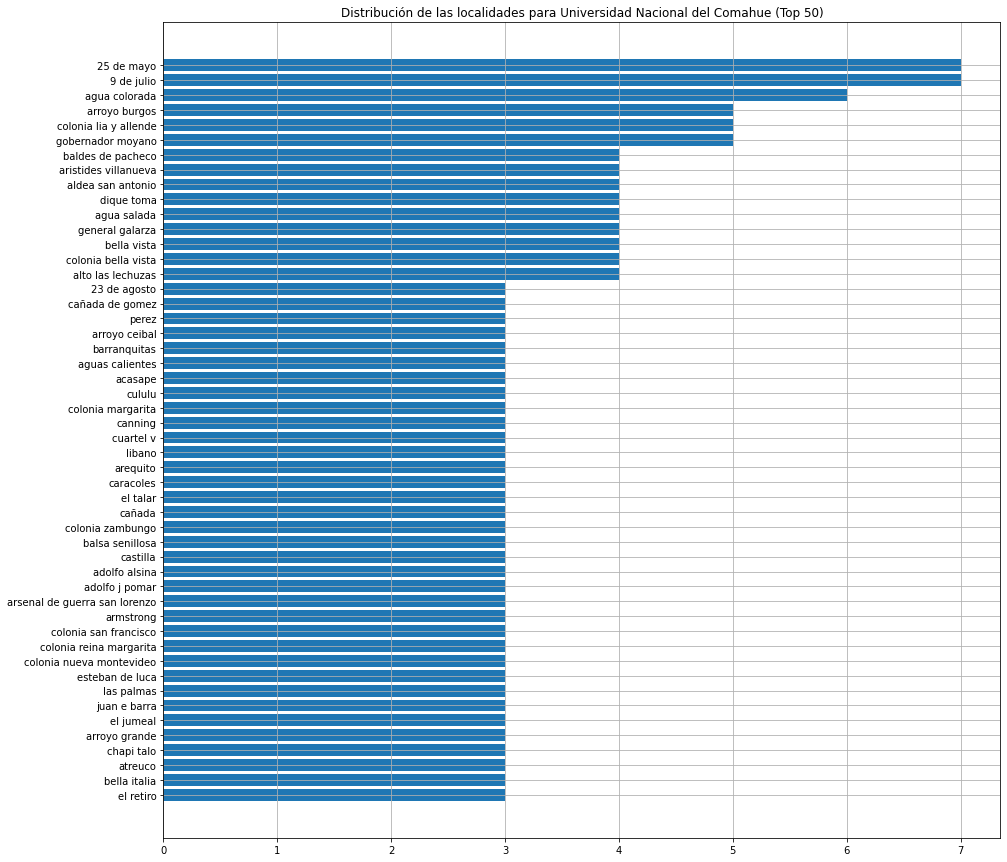

In [91]:
plt.figure(figsize=(15, 15))

plt.barh(comahue.groupby('location').count().university.sort_values().index[-50:],
        comahue.groupby('location').count().university.sort_values().values[-50:])

plt.title("Distribución de las localidades para Universidad Nacional del Comahue (Top 50)")
plt.grid()
plt.show()

In [154]:
salvador.append(comahue).groupby('location').count().university.sort_values()

location
cangallo          1
bocayuba          1
estancias         1
estela            1
estrada           1
                 ..
arroyo hondo      8
alpachiri         9
25 de mayo       12
9 de julio       13
agua colorada    16
Name: university, Length: 991, dtype: int64

In [115]:
left = salvador.groupby('career').count().university.reset_index()
right = comahue.groupby('career').count().university.reset_index()

In [120]:
merge = left.merge(right, how='outer', on='career', suffixes=('_salvador', '_comahue'))
merge['university_comahue'] = merge['university_comahue'] * -1

In [134]:
merge['total'] = merge['university_salvador'] - merge['university_comahue']
merge = merge.sort_values(by='total')

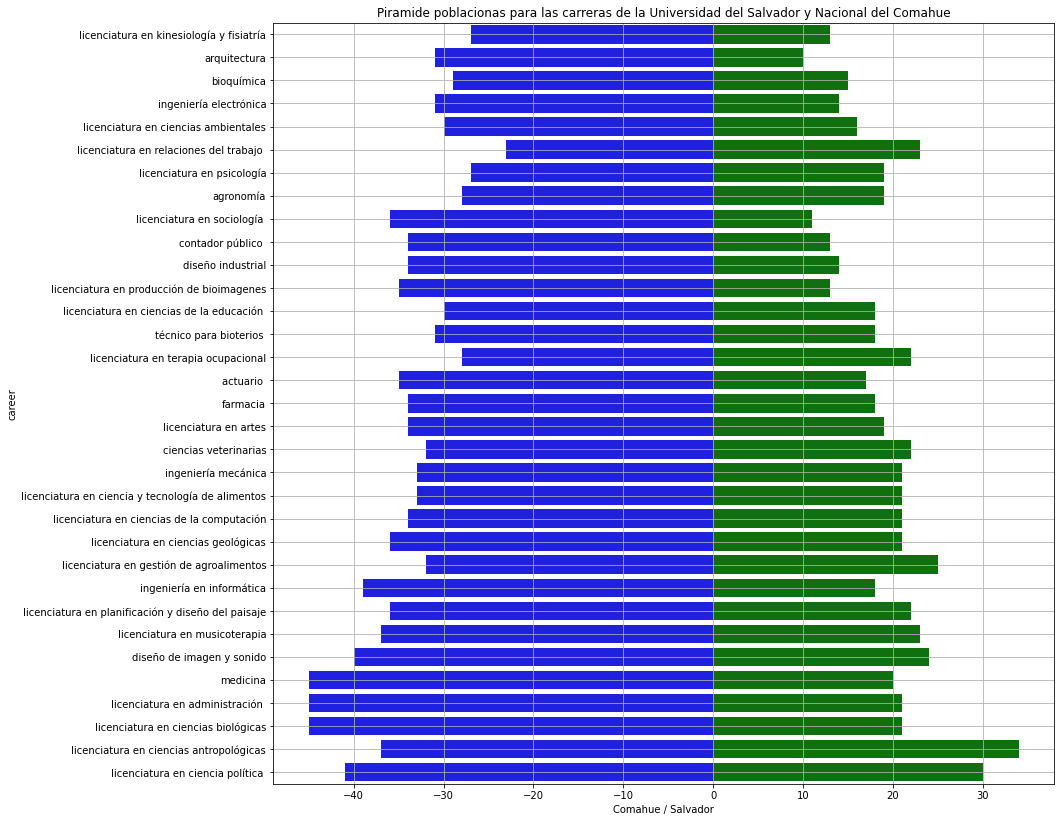

In [135]:
plt.figure(figsize=(14, 14))
ax1 = sns.barplot(x='university_salvador', y='career', data=merge, color="g")
ax2 = sns.barplot(x='university_comahue', y='career', data=merge, color="b")
plt.title("Piramide poblacionas para las carreras de la Universidad del Salvador y Nacional del Comahue")
plt.xlabel("Comahue / Salvador")
plt.grid()
plt.show()

In [136]:
merge

,career,university_salvador,university_comahue,total
23,licenciatura en kinesiología y fisiatría,13,-27,40
2,arquitectura,10,-31,41
3,bioquímica,15,-29,44
9,ingeniería electrónica,14,-31,45
16,licenciatura en ciencias ambientales,16,-30,46
28,licenciatura en relaciones del trabajo,23,-23,46
27,licenciatura en psicología,19,-27,46
1,agronomía,19,-28,47
29,licenciatura en sociología,11,-36,47
5,contador público,13,-34,47


In [128]:
comahue.groupby('career').age.describe()

,count,mean,std,min,25%,50%,75%,max
career,,,,,,,,
actuario,35.0,58.885714,21.635716,18.0,40.00,62.0,77.50,89.0
agronomía,28.0,51.250000,21.811694,18.0,30.75,51.5,68.25,90.0
arquitectura,31.0,60.709677,19.323895,21.0,45.50,55.0,79.50,90.0
bioquímica,29.0,46.758621,20.068908,19.0,32.00,38.0,59.00,85.0
ciencias veterinarias,32.0,62.500000,20.996159,22.0,47.00,61.0,83.25,90.0
contador público,34.0,44.500000,21.176388,18.0,24.75,43.0,61.25,88.0
diseño de imagen y sonido,40.0,56.650000,19.545542,19.0,46.50,56.0,71.75,90.0
diseño industrial,34.0,55.970588,22.400602,19.0,38.00,55.0,74.75,90.0
farmacia,34.0,56.911765,21.604387,21.0,36.25,62.0,73.25,90.0


In [129]:
salvador.groupby('career').age.describe()

,count,mean,std,min,25%,50%,75%,max
career,,,,,,,,
actuario,17.0,36.058824,9.296979,18.0,28.00,37.0,44.00,50.0
agronomía,19.0,33.736842,8.332281,19.0,28.50,32.0,38.00,49.0
arquitectura,10.0,36.500000,12.313046,24.0,24.25,35.0,48.50,51.0
bioquímica,15.0,34.933333,11.003030,20.0,26.00,33.0,43.50,52.0
ciencias veterinarias,22.0,34.772727,11.122400,18.0,24.50,37.5,42.50,52.0
contador público,13.0,33.000000,10.148892,18.0,26.00,29.0,40.00,50.0
diseño de imagen y sonido,24.0,31.791667,10.611639,18.0,24.50,28.5,37.25,52.0
diseño industrial,14.0,39.285714,7.955923,29.0,31.50,38.0,46.25,50.0
farmacia,18.0,32.833333,10.118417,19.0,24.50,33.0,39.25,52.0


In [130]:
salvador.groupby('gender').age.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,333.0,33.534535,9.950609,18.0,25.0,33.0,41.0,52.0
male,303.0,34.996700,10.472132,18.0,26.0,35.0,44.0,52.0


In [131]:
comahue.groupby('gender').age.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,566.0,53.833922,21.078966,18.0,37.0,53.0,72.75,90.0
male,556.0,53.473022,21.252434,18.0,35.0,54.0,72.00,90.0


In [137]:
salvador.describe()

,age,postal_code
count,636.000000,636.000000
mean,34.231132,4772.455975
std,10.220485,2156.465465
min,18.000000,1607.000000
25%,25.000000,3036.750000
50%,34.000000,4559.000000
75%,43.000000,6374.000000
max,52.000000,9409.000000


In [138]:
comahue.describe()

,age,postal_code
count,1122.000000,1122.00000
mean,53.655080,4793.48574
std,21.156431,2220.25606
min,18.000000,1601.00000
25%,35.000000,2852.50000
50%,54.000000,4625.00000
75%,72.000000,6462.50000
max,90.000000,9421.00000


# Conclusiones

Si bien los datos son muy uniformes en lo que respecta a proporciones tanto en las materias como en los generos. 
Hay algunos casos que salen de la norma cuando hacemos algunas comparaciones. 

Por ejemplo si bien la Universidad del Salvador tiene un 43% menos de estudiantes que la Universidad Nacional del Comahue. La universidad Nacional del Salvador tiene algunas materias con un alrededor de 65% menos estudiantes inscriptos que en la Nacional Comahue. Como lo son el caso de la lic. en sociología (Comahue 36 - Salvador 11) o la de contador público (Comahue 34 - 13 Salvador).

En cuanto a las edades, hay una gran diferencia, Comahue tiene una edad promedio de 53 contra Salvador que tiene una edad promedio por inscripto de 34 (30% menos)

Sobre diferencias de género en las carreras, en la Comahue hay diferencias notables en las carreras de bioquimica (50% más hombres) y en la de licenciatura en gestión de agroalimentos	(50% más mujeres). Para esta ultima pasa lo contrario en la universidad del Salvador (donde hay 50% más hombres que mujeres).

Acerca de las localidades, son muchas, pero la que más inscriptos tuvo sumando las dos universidades fue la de Agua Colorada con 16 inscriptos.